In [1]:
import re 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
import os 
import sys
import datetime 
import itertools 
import math

In [3]:
import pandas_datareader.data as web
import warnings
import matplotlib as mpl

In [4]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt 
import statsmodels.api as sm
import scipy.stats as scs 

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
from ipywidgets import interactive, widgets , RadioButtons , ToggleButtons , Select , FloatSlider , FloatProgress

In [6]:
from IPython.display import set_matplotlib_formats , Image 

In [7]:
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.figsize'] = (16, 8)
# matplotlib overrides
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

In [8]:
data = pd.read_csv('passengers.csv',sep=';',parse_dates=True, index_col=0)

In [9]:
data = data.values

In [10]:
data= data.astype('float32')

In [11]:
data

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [12]:
train = data[0:120 , :]
test = data[120: , :]


The prepare_data function will be used to transform the time series into a regression problem. The lags argument takes an integer which corresponds the number of previous time steps to use as input variables to predict the next time period. The default value is one but will be changed in a next iteration.

With the default setting a data set will be created where $X$ is the number of passengers at time $t$ and $y$ is the number of passengers at time $t+1$.

In [13]:
def prepare_data(data,lags=1):
    x,y=[],[]
    for row in range(len(data)-lags-1):
        a= data[row:(row+lags),0]
        x.append(a)
        y.append(data[row+lags,0])
    return np.array(x),np.array(y)

In [14]:
lags=1
x_train,y_train = prepare_data(train,lags)
x_test,y_test = prepare_data(test,lags)
y_true = y_test

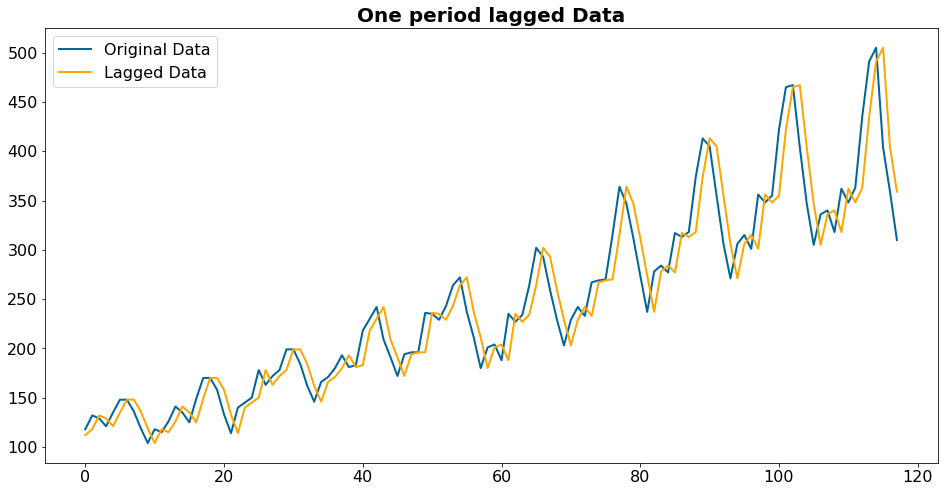

In [15]:
plt.plot(y_train, label='Original Data', color='#006699')
plt.plot(x_train, label='Lagged Data', color ='orange')
plt.legend(loc='upper left')
plt.title('One period lagged Data')
plt.show()

# Multilayer Perceptron Network

In [16]:
from keras.models import Sequential 
from keras.layers import Dense,LSTM
from keras.utils import plot_model

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
mdl = Sequential()
mdl.add(Dense(3,input_dim=lags,activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error',optimizer='adam')
mdl.fit(x_train,y_train,epochs=200,batch_size=2,verbose=2)

Epoch 1/200
 - 0s - loss: 21466.1780
Epoch 2/200
 - 0s - loss: 16355.3576
Epoch 3/200
 - 0s - loss: 11877.0415
Epoch 4/200
 - 0s - loss: 8212.5640
Epoch 5/200
 - 0s - loss: 5395.3509
Epoch 6/200
 - 0s - loss: 3433.5603
Epoch 7/200
 - 0s - loss: 2186.3303
Epoch 8/200
 - 0s - loss: 1496.1781
Epoch 9/200
 - 0s - loss: 1114.8584
Epoch 10/200
 - 0s - loss: 940.6558
Epoch 11/200
 - 0s - loss: 869.8421
Epoch 12/200
 - 0s - loss: 843.1153
Epoch 13/200
 - 0s - loss: 830.0351
Epoch 14/200
 - 0s - loss: 828.2758
Epoch 15/200
 - 0s - loss: 826.1202
Epoch 16/200
 - 0s - loss: 826.1468
Epoch 17/200
 - 0s - loss: 827.9533
Epoch 18/200
 - 0s - loss: 829.2422
Epoch 19/200
 - 0s - loss: 828.3489
Epoch 20/200
 - 0s - loss: 825.8571
Epoch 21/200
 - 0s - loss: 830.8715
Epoch 22/200
 - 0s - loss: 830.6155
Epoch 23/200
 - 0s - loss: 828.6711
Epoch 24/200
 - 0s - loss: 831.9363
Epoch 25/200
 - 0s - loss: 831.4033
Epoch 26/200
 - 0s - loss: 828.1474
Epoch 27/200
 - 0s - loss: 829.5473
Epoch 28/200
 - 0s - loss

In [19]:
train_score = mdl.evaluate(x_train, y_train,verbose=0)
print('Train Score: {:.2f}MSE({:.2F}RMSE)'.format(train_score,math.sqrt(train_score)))
test_score = mdl.evaluate(x_test, y_test,verbose=0)
print('Test Score: {:.2f}MSE({:.2F}RMSE)'.format(test_score,math.sqrt(test_score)))

Train Score: 817.72MSE(28.60RMSE)
Test Score: 2802.48MSE(52.94RMSE)


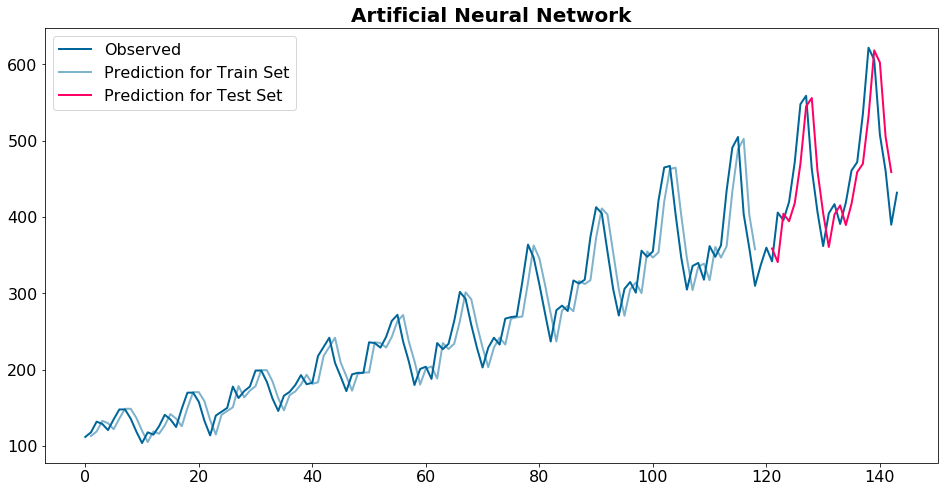

In [20]:
train_predict= mdl.predict(x_train)
test_predict = mdl.predict(x_test)

train_predict_plot = np.empty_like(data)
train_predict_plot[:,:]=np.nan
train_predict_plot[lags:len(train_predict)+lags,:]= train_predict

test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for Train Set', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='best');
plt.title('Artificial Neural Network')
plt.show()

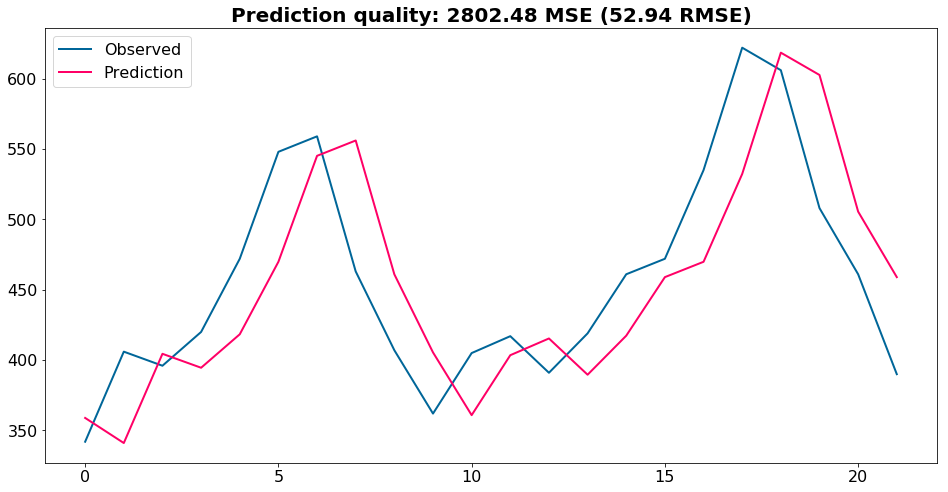

In [21]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='best');
plt.show()

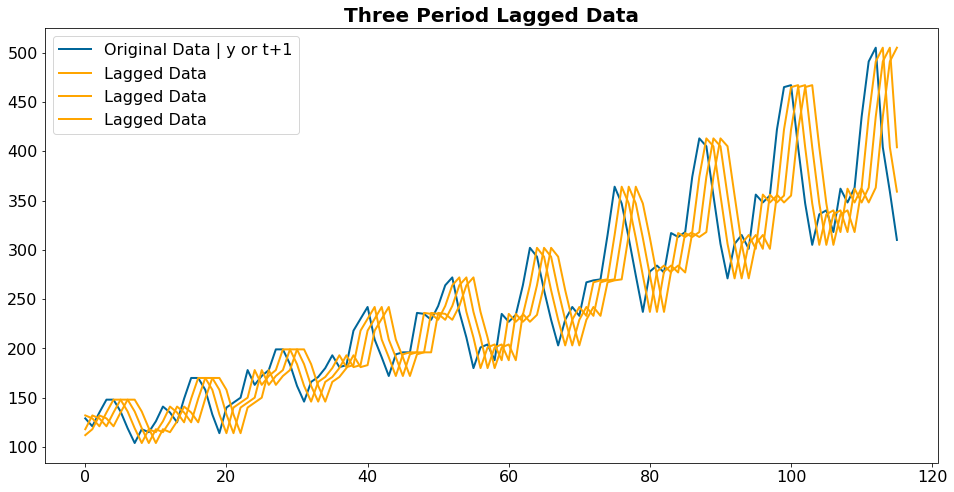

In [22]:
# reshape and lag shift the dataset
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)

# plot the created data
plt.plot(y_train, label='Original Data | y or t+1', color='#006699')
plt.plot(X_train, label='Lagged Data', color='orange')
plt.legend(loc='best')
plt.title('Three Period Lagged Data')
plt.show()